In [1]:
# Import packages and functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Import dataset
badDrivers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/Ch8-Performance/Data/bad-drivers.csv')

# Split off 20% of the data to be left out as test data
badDriversTrainingdata, testData = train_test_split(badDrivers, test_size=0.20)


# Store relevant columns as variables
X = badDriversTrainingdata[
    ['Losses incurred by insurance companies for collisions per insured driver ($)']
].values.reshape(-1, 1)
y = badDriversTrainingdata[['Car Insurance Premiums ($)']].values.reshape(-1, 1)
print(X.shape,y.shape)

badDriversTrainingdata

(40, 1) (40, 1)


,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
25,Missouri,16.1,43,34,92,84,790.32,144.45
19,Maine,15.1,38,30,87,84,661.88,96.57
2,Arizona,18.6,35,28,84,96,899.47,110.35
38,Pennsylvania,18.2,50,31,96,88,905.99,153.86
0,Alabama,18.8,39,30,96,80,784.55,145.08
35,Ohio,14.1,28,34,99,82,697.73,133.52
9,Florida,17.9,21,29,92,94,1160.13,144.18
6,Connecticut,10.8,46,36,87,82,1068.73,167.02
3,Arkansas,22.4,18,26,94,95,827.34,142.39
32,New York,12.3,32,29,88,80,1234.31,150.01


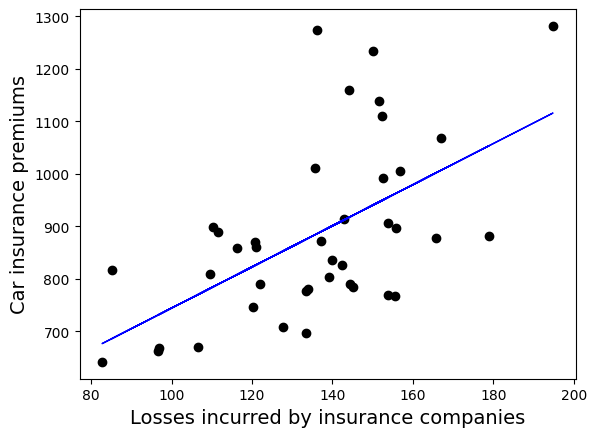

In [8]:
# Fit a linear model to the data
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Plot the fitted model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=1)
plt.xlabel('Losses incurred by insurance companies', fontsize=14);
plt.ylabel('Car insurance premiums', fontsize=14);

In [10]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
ten_fold_scores = -cross_val_score(
    linModel, X, y, scoring='neg_mean_squared_error', cv=10
)

print(ten_fold_scores)

print(ten_fold_scores.mean())

[ 9554.76952174 28473.56400702 66570.33423458  6196.21991135
 16066.66798447 12516.33104933 12281.2392907  19382.37490035
 15106.25922022 18158.23617368]
20430.59962934305


In [11]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
LOOCV_scores = -cross_val_score(linModel, X, y, scoring='neg_mean_squared_error', cv=40)
print(LOOCV_scores)
LOOCV_scores.mean()


[1.74108148e+04 5.77128281e+03 1.46248108e+04 2.64536654e+03
 1.97409036e+04 3.33288669e+04 6.23574798e+04 4.39385628e+03
 7.29588231e+03 9.26427162e+04 1.58597322e+05 4.87003276e+03
 1.30281700e+03 1.70144718e+04 1.93291355e+03 2.09517905e+03
 4.76230761e+03 6.37118865e+03 3.74418970e+04 9.76648427e+03
 2.80556800e+03 1.66323504e+03 4.06507451e+04 1.26804818e+00
 3.15948107e+02 8.69647186e+02 2.81276308e+04 2.22734573e+04
 4.11176404e+04 1.73065800e+04 1.11117824e+04 1.67472366e+03
 4.48361162e+03 3.95886142e+04 9.43333372e+03 1.00760038e+04
 2.26352032e+04 3.69862258e+04 1.13503398e+04 1.55920484e+03]


np.float64(20209.93392018125)

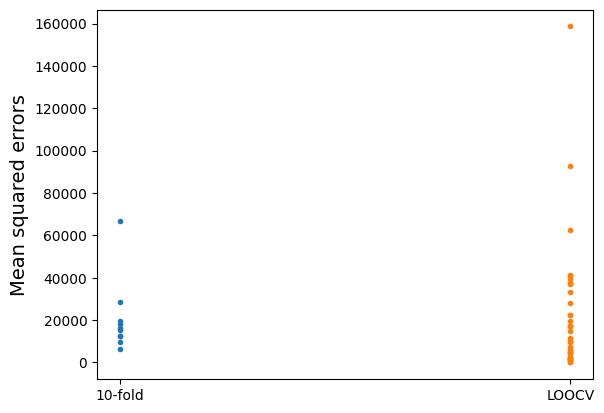

In [12]:
# Plot the errors for both scores
plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14);
plt.xticks([0, 1], ['10-fold', 'LOOCV']);

**LOOCV typically produces higher variance in error estimates: **
1. **Sensitivity to Single Validation Points:**

In LOOCV, each validation error estimate depends entirely on the model's performance on a single data point. If the point is easy to predict, the error will be low; if it’s difficult or an outlier, the error will be high. This sensitivity to each individual point introduces substantial variability in the error estimates across iterations.


**2.Overfitting to Larger Training Sets:**

Since LOOCV uses nearly the entire dataset for training (minus one point), it tends to fit very closely to the data, potentially capturing specific details or noise unique to the training set.
When evaluated on each individual left-out point, this “overfitted” model may perform inconsistently, especially if the left-out point differs from the rest, leading to higher error variability across iterations.


